In [381]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

# Project Notes

For this project, we will collate three different datasets, namely:

>1. **Enhanced Twitter Archive**: Which includes basic tweet data for WeRateDogs account tweets. It needs to be checked for correct ratings, dog names, dog stages, and maybe more. Gathered manually as ***twitter_archive_enhanced.csv***.
>2. **Image Predictions File**: Which includes a classification of dog breeds based on a neural network run-through of the Twitter Archive tweets. It will show top three image predictions alongside tweet ID, image URL, image number, and confidence rating of the prediction. Gathered programmatically from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv as ***image_predictions.tsv***.
>3. **Additional Data via the Twitter API**: Which should include retweet and favorite counts. Gathered using tweet IDs in the WeRateDogs Twitter archive to query the Twitter API for each tweet's JSON data using Python's Tweepy library, and storing each tweet's entire set of JSON data in a file called ***tweet_json.txt***.

For each of these, the three data wrangling steps will be performed:

>1. **Gather**
>2. **Assess**
>3. **Clean**

When we assess data, we will try to at least identify 8 quality issues, and 2 tidiness issues, according to the following:
>- **Quality**: issues with content. Low quality data is also known as dirty data.
>- **Tidiness**: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements: (a) each variable forms a column, (b) each observation forms a row, (c) each type of observational unit forms a table.

After which we will analyze and visualize (with at least 3 insights and 1 visualization).

*Additional note: No tweets will be gathered beyond August 1st, 2017.*

### Table of contents:

1. Data Wrangling

$\;\;\;$ 1.1 $\;\;\;\;\;\;$ Enhanced Twitter Archive <br>
$\;\;\;\;$ 1.1.1 $\;\;\;$ Gather <br>
$\;\;\;\;$ 1.1.2 $\;\;\;$ Assess <br>
$\;\;\;\;$ 1.1.3 $\;\;\;$ Clean

$\;\;\;$ 1.2 $\;\;\;\;\;\;$ Image Predictions File <br>
$\;\;\;\;$ 1.2.1 $\;\;\;$ Gather <br>
$\;\;\;\;$ 1.2.2 $\;\;\;$ Assess <br>
$\;\;\;\;$ 1.2.3 $\;\;\;$ Clean 

$\;\;\;$ 1.3 $\;\;\;\;\;\;$ Additional Data via the Twitter API <br>
$\;\;\;\;$ 1.3.1 $\;\;\;$ Gather <br>
$\;\;\;\;$ 1.3.2 $\;\;\;$ Assess <br>
$\;\;\;\;$ 1.3.3 $\;\;\;$ Clean 

$\;\;\;$ 1.4 $\;\;\;\;\;\;$ Merge datasets and ready for exploration and analysis

2. Analysis


# 1. Data Wrangling
## 1.1 Enhanced Twitter Archive
### 1.1.1 Gather

In [82]:
#X# DEV NOTE: NEEDS TO BE RUN
df1 = pd.read_csv('udacity_py/twitter/twitter-archive-enhanced.csv')

### 1.1.2 Assess

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. Each tweet's text is used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, filtered tweets with ratings only amount to 2356.

**Quality Issues**

- Ratings:    There are 23 entries where the rating_denominator is not 10

- Ratings:    For entries with denominator 10, there are 24 with a 20+ numerator (lowest are 26, 27, and rest is 75 or much higher)

- Dog names:  There are 745 "None" and 55 "a" entries for dog names

- Dog names:  There are 54 dog names entries that are non name words starting with lower case letter

- Retweets:   181 entries are retweets

- Expanded URLs: There are 59 expanded_urls missing (with NaN value), of the valued ones, 79 are duplicated.

- Source:     Tweets derive from 4 different tweet sources whose values are enclosed in html script

- Timestamp:  Time field includes date and time, as well as a postfix of " +0000"

- Dog stages: 84% of entries do not have a dog stage identified

- Dog stages: The non-identified dog stages are valued as a string 'None' instead of Null (NaN)

**Tidiness Issues**

- Dog stages: Dog stage observation is provided in 4 seperate columns

- Retweets:   Retweets are basically a duplication of an earlier tweet, stored within this same table with added retweet related columns

In [131]:
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [132]:
# checking for retweets
df1.query('retweeted_status_id == retweeted_status_id').count()
# above returns 181 retweets, and shows those have 'RT' as prefix. Below doublecheck for 'RT' prefix finds 183 retweets.
df1[df1['text'].str[:2] == 'RT'].count()[0]

183

In [133]:
# double check of those two extra entries shows it's a genuine tweet, the prefix is coincidental
non_retwt_status = df1[df1['retweeted_status_id'] != df1['retweeted_status_id']]
non_retwt_status[non_retwt_status['text'].str[:2] == 'RT']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None


In [134]:
# checking for entries where rating denominator is not 10
df1.query('rating_denominator != 10').count()[0]

23

In [178]:
# checking for rating numerator outliers where denominator is 10
df1.query('rating_denominator == 10')['rating_numerator'].value_counts().sort_index()

0         2
1         8
2         9
3        19
4        15
5        37
6        32
7        54
8       102
9       156
10      461
11      463
12      558
13      351
14       54
15        2
17        1
26        1
27        1
75        2
182       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64

In [136]:
# checking for count of entries with numerator higher than 20
df1.query('rating_numerator > 20').shape[0]

24

In [203]:
# checking dog name values and counts per value
df1.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
             ... 
Pawnd           1
incredibly      1
Sweet           1
Brian           1
Jerome          1
Name: name, Length: 957, dtype: int64

In [207]:
# check how many unique names
df1.nunique()['name']

957

In [9]:
# check names that start with lower case (excluding names "a"), which presumably are not names

df_names_lower = df1[df1['name'].str[:1].str.lower() == df1['name'].str[:1]]
df_names_lower = df_names_lower.query('name != "a"')
df_names_lower['name'].value_counts()

the             8
an              7
very            5
just            4
quite           4
one             4
not             2
mad             2
getting         2
actually        2
light           1
such            1
all             1
this            1
incredibly      1
officially      1
old             1
life            1
his             1
by              1
my              1
infuriating     1
space           1
unacceptable    1
Name: name, dtype: int64

In [140]:
df1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [156]:
# check how many urls are NaN
df1[df1.expanded_urls != df1.expanded_urls].shape[0]

59

In [157]:
# check how many urls are duplicates
df1.expanded_urls[df1.expanded_urls.duplicated()].count()

79

In [162]:
# check count for each source entry
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [172]:
# check if all timestamps have the +0000 postfix
df1.timestamp.str[-5:].value_counts()

+0000    2356
Name: timestamp, dtype: int64

### 1.1.3 Clean

the following cleaning actions will be performed for the above assessed issues.

**Quality Issues**

- Ratings *[completed]*:    Remove the 23 entries where the rating_denominator is not 10

- Ratings *[completed]*:    Remove entries with a 20+ numerator

- Dog names *[completed]*:  Replace the 55 "a" entries for dog names with NaN

- Dog names *[completed]*:  Replace 'None' dog names with NaN

- Dog names *[completed]*:  Replace the other 54 dog names entries that are words (starting with lower case letter) with NaN

- Retweets *[completed]*:   Remove the 181 retweets records

- Expanded URLs *[completed]*: Remove the 59 entries with expanded_urls missing (with NaN value)

- Source *[completed]*:     Remove the html pre and postfix to the human language 'source' value

- Timestamp *[completed]*:  Change timestamp to date only

- Dog stages *[completed]*: Replace 'None' dog stages with Null (NaN)

**Tidiness Issues**

- Dog stages *[completed]*: Convert the 4 seperate dog stage columns into a single one

- Rating *[completed]*:     Add a column to display score based on rating numnerator/denominator to support with analysis (without removing the two rating columns, as those could come in handy for weighted scores in aggregated calculations)

- Retweets *[completed]*:   Save retweet entries in a seperate dataset with id 'foreign key' and normalize with only retweet specific variables



In [21]:
# Remove the 23 entries where the rating_denominator is not 10
df1v2 = df1.query('rating_denominator == 10')

In [22]:
# Remove entries with a 20+ numerator
df1v2 = df1.query('rating_numerator <= 20')

In [23]:
# Replace the 55 "a" entries for dog names with NaN
df1v2['name'] = df1v2['name'].replace('a',None)

<ipython-input-23-1a98b9e905c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1v2['name'] = df1v2['name'].replace('a',None)


In [24]:
# Replace the other 54 dog names entries that are words (starting with lower case letter) with NaN
df_names_lower = df1[df1['name'].str[:1].str.lower() == df1['name'].str[:1]]
df_names_lower = df_names_lower.query('name != "a"')
words_list = df_names_lower['name'].value_counts().index.to_list()

for phrase in words_list:
    df1v2.name.replace(phrase, None, inplace=True)

In [25]:
# Replace 'None' dog names with actual NaN, so it doesn't appear as a string name 'None' but is treated as Null
df1v2.name = df1v2['name'].replace('None', np.nan, regex=True)

In [26]:
# Remove the 181 retweets records
df1v2 = df1v2.query('retweeted_status_id != retweeted_status_id')

In [27]:
# Remove entries with expanded_urls missing (with NaN value)

# Below code shows that previous actions only left one missing expanded_urls
df1v2[df1v2.expanded_urls != df1v2.expanded_urls].shape[0]

# Code to remove entries with expanded_urls missing (with NaN value)
df1v2 = df1v2[df1v2.expanded_urls == df1v2.expanded_urls]

In [28]:
# Check new shape
df1v2.shape

(2098, 17)

In [29]:
# Reset index to allow for index based loop in next cell (drop True is used to prevent an index column from being added)
df1v2.reset_index(inplace=True, drop=True)

In [30]:
# Remove the html pre and postfix to the human language 'source' value

for i in range(df1v2.shape[0]):
    try:
        df1v2.source[i] = df1v2.source[i][df1v2.source[i].find('>')+1:][:-4]
    except:
        continue

<ipython-input-30-7704defa2fbd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1v2.source[i] = df1v2.source[i][df1v2.source[i].find('>')+1:][:-4]


In [31]:
# Double check new source values
df1v2.source.value_counts()

Twitter for iPhone     1967
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

In [32]:
# Change timestamp to date only and convert to datetime type
df1v2.timestamp = pd.to_datetime(df1v2.timestamp.str[:10])

In [33]:
# Convert the 4 seperate dog stage columns into a single one:

# Combine the four dog columns
dog_stage = df1v2.doggo+df1v2.floofer+df1v2.pupper+df1v2.puppo
# Remove all the 'None' values
dog_stage = dog_stage.str.replace('None','')
# Replace the empty space with NaN
dog_stage = dog_stage.replace(r'^\s*$', np.nan, regex=True)

# Drop the four columns and add the resulting single column
df1v2.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)
df1v2['dog_stage'] = dog_stage

In [34]:
# Save retweet entries in a seperate dataset with id 'foreign key' and normalize with only retweet specific variables

df1v2['rating'] = df1v2.rating_numerator / df1v2.rating_denominator 

In [83]:
# ONE CELL TO RUN ALL CODE IN THIS SECTION

df1v2 = df1.query('rating_denominator == 10')

df1v2 = df1.query('rating_numerator <= 20')

df1v2['name'] = df1v2['name'].replace('a',None)

df_names_lower = df1[df1['name'].str[:1].str.lower() == df1['name'].str[:1]]
df_names_lower = df_names_lower.query('name != "a"')
words_list = df_names_lower['name'].value_counts().index.to_list()
for phrase in words_list:
    df1v2.name.replace(phrase, None, inplace=True)

df1v2.name = df1v2['name'].replace('None', np.nan, regex=True)

df1v2 = df1v2.query('retweeted_status_id != retweeted_status_id')

df1v2[df1v2.expanded_urls != df1v2.expanded_urls].shape[0]
df1v2 = df1v2[df1v2.expanded_urls == df1v2.expanded_urls]

df1v2.reset_index(inplace=True, drop=True)

for i in range(df1v2.shape[0]):
    try:
        df1v2.source[i] = df1v2.source[i][df1v2.source[i].find('>')+1:][:-4]
    except:
        continue
        
df1v2.timestamp = pd.to_datetime(df1v2.timestamp.str[:10])

dog_stage = df1v2.doggo+df1v2.floofer+df1v2.pupper+df1v2.puppo
dog_stage = dog_stage.str.replace('None','')
dog_stage = dog_stage.replace(r'^\s*$', np.nan, regex=True)
df1v2.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)
df1v2['dog_stage'] = dog_stage

df1v2['rating'] = df1v2.rating_numerator / df1v2.rating_denominator 



<ipython-input-83-a56f3b2df75a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1v2['name'] = df1v2['name'].replace('a',None)
C:\Users\durgun\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-83-a56f3b2df75a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

## 1.2 Image Predictions File
### 1.2.1 Gather


In [98]:
# Get tsv file from url and check type
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url).content
type(req)

bytes

In [99]:
# How to read bytes into dataframe, found: https://stackoverflow.com/questions/47379476/how-to-convert-bytes-data-into-a-python-pandas-dataframe
from io import StringIO

s=str(req,'utf-8')
data = StringIO(s) 
df2 = pd.read_csv(data ,delimiter='\t')

### 1.2.2 Assess

**Quality Issues**

- Dog prediction:    Of all images, 16% could not be predicted as a dog
- Dog breed names:   Dog breed predictions have inconsistent name strings, with or without underscores or capital letters

**Tidiness Issues**

- Dog prediction:    There are three columns for three dog predictions at different confidence levels

In [100]:
df2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [102]:
# Check proportion of entries where at least one prediction is that of a dog
df2.query('p1_dog == True | p2_dog == True | p3_dog == True').shape[0] / df2.shape[0]

0.843855421686747

### 1.2.3 Clean

**Quality Issues**

- Dog prediction *[completed]*:    Remove the image entries where no dog was predicted
- Dog breed names *[completed]*:   Replace underscores with space and have each word start with capital letter for dog breeds

**Tidiness Issues**

- Dog prediction *[completed]*:    Consolidate dog predictions into one single column

In [103]:
# Consolidate dog predictions into one single column

# Get the most confident prediction of a dog and list the dog and confidence in seperate lists
dog_lst = []
conf_lst = []

for i in range(df2.shape[0]):
    if df2.p1_dog[i] == True:
        dog = df2.p1[i]
        conf = df2.p1_conf[i]
    elif df2.p2_dog[i] == True:
        dog = df2.p2[i]
        conf = df2.p2_conf[i]
    elif df2.p3_dog[i] == True:
        dog = df2.p3[i]
        conf = df2.p3_conf[i]
    else:
        dog = np.nan
        conf = np.nan
        
    dog_lst.append(dog)
    conf_lst.append(conf)

# Merge resulting lists into the dataframe
df2v2 = df2.copy()
df2v2['dog'] = dog_lst
df2v2['conf'] = conf_lst

# Remove the other prediction columns
df2v2.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [104]:
# Remove the entries where no dog was predicted
df2v2.dropna(inplace=True)
# Check resulting shape
df2v2.shape

(1751, 5)

In [606]:
# Replace underscores with space and have each word start with capital letter for dog breeds
df2v2['dog'] = df2v2['dog'].str.replace("_"," ")
df2v2['dog'] = df2v2['dog'].str.title()

## 1.3 Additional Data via the Twitter API
### 1.3.1 Gather

In [91]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# Get third dataset
df3 = pd.read_csv('udacity_py/twitter/tweet-json.txt', delimiter = "\t", header=None)

### 1.3.2 Assess

**Quality Issues**

- Data comes in with json/dictionary formatted large string for each tweet, currently unreadable for human eye

**Tidiness Issues**

- Multiple variables in a single column destined to be various data types

In [139]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2354 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


In [141]:
# Check one cell's string
df3[0][0]

'{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"med

In [144]:
# Parse string into json to see how our desired variables can be captured
parsed_json = json.loads(df3.iloc[i,0])
parsed_json

# Based on that, get desired variables via: parsed_json['id'] , parsed_json['favorite_count'] , parsed_json['retweet_count']

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 340, 'h': 255, 'resize': 'fit'},
     'medium': {'w': 600, 'h': 450, 'resize': 'fit

### 1.3.3 Clean

**Quality Issues**

- Parse string values for each cell into json and capture single readable variables seperately

**Tidiness Issues**

- Make a column for each variable

In [114]:
# Create dataframe of captured values from parsed json
tweet_id = []
fav = []
retwt = []

for i in range(len(df3)):
    parsed_json = json.loads(df3.iloc[i,0])
    tweet_id.append(parsed_json['id'])
    fav.append(parsed_json['favorite_count'])
    retwt.append(parsed_json['retweet_count'])

df3v2 = pd.DataFrame({'tweet_id':tweet_id,'fav':fav,'retwt':retwt})

## 1.4 Merge datasets and ready for exploration and analysis

The below codes gather and clean the previously individually wrangled datasets into one single dataset.

In [607]:
# From each of the three sources, select only columns relevant for analysis based on hypotheses (formed during assess/explore)
df1v3 = df1v2[['tweet_id','timestamp','source','rating_numerator','rating_denominator','rating','name','dog_stage']].copy()
df2v3 = df2v2[['tweet_id','dog','conf']].copy()

In [608]:
# Join the three datasets onto each other for one analysis-ready dataset
df = df1v3.merge(df2v3,on='tweet_id',how='inner').merge(df3v2,on='tweet_id',how='inner')
df.head(4)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,rating,name,dog_stage,dog,conf,fav,retwt
0,892177421306343426,2017-08-01,Twitter for iPhone,13,10,1.3,Tilly,NaN,Chihuahua,0.323581,33819,6514
1,891815181378084864,2017-07-31,Twitter for iPhone,12,10,1.2,Archie,NaN,Chihuahua,0.716012,25461,4328
2,891689557279858688,2017-07-30,Twitter for iPhone,13,10,1.3,Darla,NaN,Labrador Retriever,0.168086,42908,8964
3,891327558926688256,2017-07-29,Twitter for iPhone,12,10,1.2,Franklin,NaN,Basset,0.555712,41048,9774




  

# 2 Analysis

Explore, hypothesize, and conclude.

In [609]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

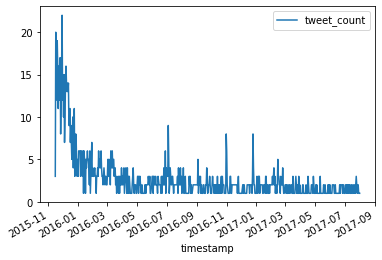

In [610]:
# Check whether there is anything noteworthy about tweets by date
df_tweets_by_day = pd.DataFrame()

df_tweets_by_day['timestamp'] = df.groupby('timestamp').count()['tweet_id'].sort_index().reset_index()['timestamp']
df_tweets_by_day['tweet_count'] = df.groupby('timestamp').count()['tweet_id'].sort_index().reset_index()['tweet_id']

df_tweets_by_day.set_index('timestamp', inplace=True)

df_tweets_by_day.plot();

In [611]:
# Check top 10 dog names
df.name.value_counts().head(10)

Oliver     11
Lucy       10
Cooper     10
Charlie    10
Tucker      9
Penny       8
Daisy       7
Winston     7
Sadie       7
Toby        6
Name: name, dtype: int64

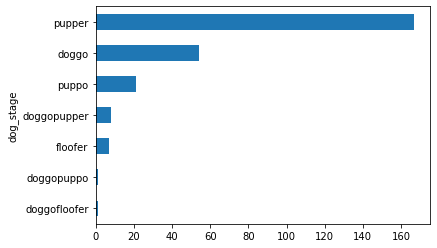

In [612]:
# Most tweeted about dog stages
df.groupby('dog_stage').count()['tweet_id'].sort_values(ascending=True).plot(kind='barh');

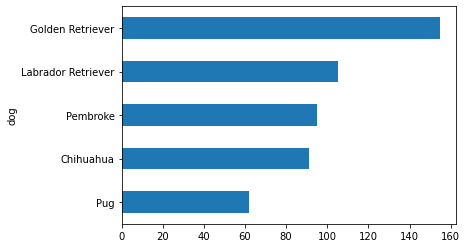

In [613]:
# Most tweeted about dog breeds
df.groupby('dog').count()['tweet_id'].sort_values(ascending=True).tail().plot(kind='barh');

In [614]:
# Use below cells to check the top 5 dog breeds per dog stage (of 4 highest tweeted stages)
'Pupper: ' ,df.query('dog_stage == "pupper"').groupby('dog').count()['tweet_id'].sort_values(ascending=False)[:5]

('Pupper: ',
 dog
 Golden Retriever      16
 Pug                   11
 Labrador Retriever    10
 Pembroke              10
 Pomeranian             8
 Name: tweet_id, dtype: int64)

In [615]:
'Doggo: ' ,df.query('dog_stage == "doggo"').groupby('dog').count()['tweet_id'].sort_values(ascending=False)[:5]

('Doggo: ',
 dog
 Golden Retriever      10
 Labrador Retriever     5
 German Shepherd        3
 Pomeranian             2
 Great Pyrenees         2
 Name: tweet_id, dtype: int64)

In [616]:
'Puppo: ' ,df.query('dog_stage == "puppo"').groupby('dog').count()['tweet_id'].sort_values(ascending=False)[:5]

('Puppo: ',
 dog
 Eskimo Dog                        3
 Golden Retriever                  3
 Labrador Retriever                3
 Airedale                          1
 American Staffordshire Terrier    1
 Name: tweet_id, dtype: int64)

In [617]:
'Doggopupper: ' ,df.query('dog_stage == "doggopupper"').groupby('dog').count()['tweet_id'].sort_values(ascending=False)[:5]

('Doggopupper: ',
 dog
 Golden Retriever          4
 Dalmatian                 2
 Curly-Coated Retriever    1
 Labrador Retriever        1
 Name: tweet_id, dtype: int64)

In [619]:
# Use below cells to check the top 5 tweeted dog breeds, and in which stages they are found
df.query('dog == "Golden Retriever"').groupby('dog_stage').count()['tweet_id'].sort_values(ascending=False)[:5]

dog_stage
pupper         16
doggo          10
doggopupper     4
puppo           3
floofer         1
Name: tweet_id, dtype: int64

In [620]:
df.query('dog == "Labrador Retriever"').groupby('dog_stage').count()['tweet_id'].sort_values(ascending=False)[:5]

dog_stage
pupper         10
doggo           5
puppo           3
doggopupper     1
Name: tweet_id, dtype: int64

In [621]:
df.query('dog == "Pembroke"').groupby('dog_stage').count()['tweet_id'].sort_values(ascending=False)[:5]

dog_stage
pupper    10
doggo      2
puppo      1
Name: tweet_id, dtype: int64

In [622]:
df.query('dog == "Chihuahua"').groupby('dog_stage').count()['tweet_id'].sort_values(ascending=False)[:5]

dog_stage
pupper    8
doggo     1
Name: tweet_id, dtype: int64

In [624]:
df.query('dog == "Pug"').groupby('dog_stage').count()['tweet_id'].sort_values(ascending=False)[:5]

dog_stage
pupper    11
Name: tweet_id, dtype: int64

### Insight 1:  Golden Retriever the most tweeted about dog breed!

Golden Retrievers are most tweeted about on WeRateDogs. In fact, they consistently show as top tweeted about dog breed for each dog stage (except floofer). Another interesting observation about breeds is that Pugs are the only top5 tweeted about dog breeds that finds itself exclusively in the Pupper stage. 

In [625]:
# Check amount of unique dog breeds in dataset
df.dog.nunique()

112

In [653]:
# Visual check on dog breed averages
df.groupby('dog').mean()

,tweet_id,rating_numerator,rating_denominator,rating,conf,fav,retwt
dog,,,,,,,
Afghan Hound,8.041621e+17,9.666667,10.0,0.966667,0.433959,17326.666667,5976.000000
Airedale,7.184489e+17,9.833333,10.0,0.983333,0.583771,5280.833333,1393.750000
American Staffordshire Terrier,7.597284e+17,10.312500,10.0,1.031250,0.527359,9380.187500,2310.812500
Appenzeller,7.939334e+17,11.000000,10.0,1.100000,0.503665,7317.500000,1458.000000
Australian Terrier,7.785921e+17,11.500000,10.0,1.150000,0.307584,11127.500000,3078.500000
...,...,...,...,...,...,...,...
Welsh Springer Spaniel,7.318789e+17,9.500000,10.0,0.950000,0.349942,5056.000000,1106.000000
West Highland White Terrier,7.170550e+17,10.066667,10.0,1.006667,0.529993,5557.200000,1325.066667
Whippet,7.424905e+17,10.181818,10.0,1.018182,0.455646,12911.454545,4840.272727


In [657]:
df.groupby('dog').mean()['rating'].sort_values(ascending=False)

dog
Bouvier Des Flandres           1.300000
Saluki                         1.250000
Briard                         1.233333
Tibetan Mastiff                1.225000
Border Terrier                 1.214286
                                 ...   
Tibetan Terrier                0.925000
Scotch Terrier                 0.900000
Walker Hound                   0.900000
Soft-Coated Wheaten Terrier    0.853846
Japanese Spaniel               0.500000
Name: rating, Length: 112, dtype: float64

In [658]:
# Create dataframe for analysis on dog breeds and aggregated scores
df_dog = pd.DataFrame()

df_dog['breed'] = df.groupby('dog').mean()['rating'].sort_values(ascending=False).index.tolist()
df_dog['avg_rating'] = df.groupby('dog').mean()['rating'].sort_values(ascending=False).values.tolist()


df_dog

,breed,avg_rating
0,Bouvier Des Flandres,1.300000
1,Saluki,1.250000
2,Briard,1.233333
3,Tibetan Mastiff,1.225000
4,Border Terrier,1.214286
...,...,...
107,Tibetan Terrier,0.925000
108,Scotch Terrier,0.900000
109,Walker Hound,0.900000
110,Soft-Coated Wheaten Terrier,0.853846


In [659]:
# Create dataframe grouped by dog breeds again to join with the prev
df_dog_count = pd.DataFrame()

df_dog_count['breed'] = df.groupby('dog').count()['tweet_id'].index.tolist()
df_dog_count['tweets'] = df.groupby('dog').count()['tweet_id'].values.tolist()

In [680]:
# Create dataframe grouped by dog breeds again to join with the prev
df_dog_sum = pd.DataFrame()

df_dog_sum['breed'] = df.groupby('dog').sum()['fav'].index.tolist()
df_dog_sum['total_fav'] = df.groupby('dog').sum()['fav'].values.tolist()
df_dog_sum['total_retwt'] = df.groupby('dog').sum()['retwt'].values.tolist()

df_dog['avg_fav'] = df.groupby('dog').mean()['fav'].values.tolist()
df_dog['avg_retwt'] = df.groupby('dog').mean()['retwt'].values.tolist()

In [681]:
# Merge the three datasets
df_dog_v2 = df_dog.merge(df_dog_count,how='inner',on='breed').merge(df_dog_sum,how='inner',on='breed')

df_dog_v2.set_index('breed',inplace=True)
df_dog_v2.head(4)

,avg_rating,avg_fav,avg_retwt,tweets,total_fav,total_retwt
breed,,,,,,
Bouvier Des Flandres,1.300000,17326.666667,5976.0000,1,18032.0,4479.0
Saluki,1.250000,5280.833333,1393.7500,4,96240.0,20535.0
Briard,1.233333,9380.187500,2310.8125,3,28535.0,8900.0
Tibetan Mastiff,1.225000,7317.500000,1458.0000,4,48694.0,16772.0


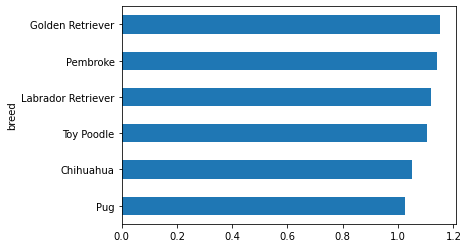

In [682]:
# Check for top rated dog breeds with min 50 tweets
df_dog_v2.query('tweets >= 50')['avg_rating'].sort_values().plot(kind='barh');

(0.0, 1.5)

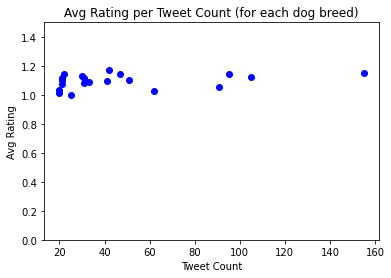

In [666]:
# Check if there's a clear relation between amount of tweets and rating by dog breed
plt.scatter(top20_most_tweeted_dogs.tweets,top20_most_tweeted_dogs.avg_rating, color='b');
plt.ylabel('Avg Rating')
plt.xlabel('Tweet Count')
plt.title('Avg Rating per Tweet Count (for each dog breed)')
plt.ylim([0, 1.5])

In [683]:
# Top 20 rated dogs with min 10 tweets
top10_most_tweeted_dogs = df_dog_v2.query('tweets >= 10').sort_values('tweets', ascending=False)
top10_most_tweeted_dogs.sort_values('avg_rating', ascending=False).head(5)

,avg_rating,avg_fav,avg_retwt,tweets,total_fav,total_retwt
breed,,,,,,
Samoyed,1.169048,7284.000000,1616.545455,42,583906.0,203446.0
Golden Retriever,1.153021,17012.000000,4164.500000,155,1936576.0,584805.0
Great Pyrenees,1.142857,13578.000000,3377.142857,14,183646.0,66980.0
Pembroke,1.141053,5537.000000,1753.800000,95,1039484.0,292052.0
Eskimo Dog,1.140909,5289.583333,1446.916667,22,235104.0,93183.0


### Insight 2:  Samoyed is the best rated breed!

Of the dog breeds that WeRateDogs has tweeted about at least 10 times, Samoyeds are the top rated.

In [570]:
# Create new dataframe that shows aggregated variables by rating_numerator 
df_fav_by_rating = pd.DataFrame()
df_fav_by_rating['rating'] = df.groupby('rating_numerator')['fav'].mean().index
df_fav_by_rating['avg_fav'] = df.groupby('rating_numerator')['fav'].mean().values.tolist()
df_fav_by_rating['avg_retwt'] = df.groupby('rating_numerator')['retwt'].mean().values.tolist()
df_fav_by_rating['tweets'] = df.groupby('rating_numerator')['tweet_id'].count().values.tolist()

In [684]:
# Filter out outliers (those ratings that have less than 10 tweets)
df_fav_by_rating = df_fav_by_rating.query('rating >= 5')
df_fav_by_rating

,rating,avg_fav,avg_retwt,tweets
5,5,5686.142857,1519.214286,14
6,6,3382.312500,1178.500000,16
7,7,3166.562500,1322.187500,32
8,8,2233.882353,787.838235,68
9,9,2678.954887,913.112782,133
10,10,4062.800000,1465.213889,360
11,11,6673.297753,2154.918539,356
12,12,11473.617021,3145.988180,423
13,13,23184.449782,7055.266376,229
14,14,29125.652174,8847.173913,23


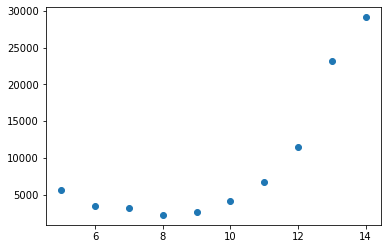

In [578]:
# Ratings vs Favs
plt.scatter(df_fav_by_rating.rating,df_fav_by_rating.avg_fav);

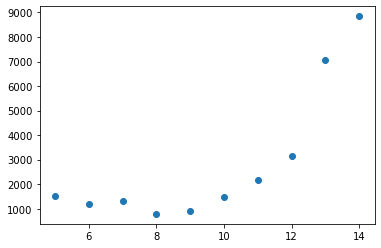

In [577]:
# Ratings vs Retweets
plt.scatter(df_fav_by_rating.rating,df_fav_by_rating.avg_retwt);

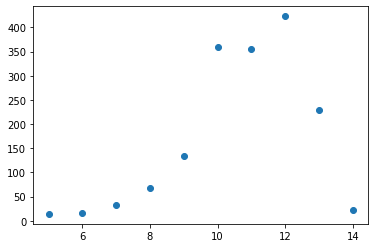

In [580]:
# Ratings vs Tweet count
plt.scatter(df_fav_by_rating.rating,df_fav_by_rating.tweets);

### Insight 3:  Dog ratings and popularity are aligned

Twitter users seem to agree with WeRateDogs ratings. This is seen in the higher favorite and retweet count for dogs that have higher ratings.

# Visualization and Images

In [854]:
# Check top 10 rated dogs (with minimum 10 tweet count) and prepare for visualization
top10_rated_dogs = top10_most_tweeted_dogs.sort_values('avg_rating', ascending=False).head(10)[['tweets','avg_rating','avg_fav']]
top10_rated_dogs

,tweets,avg_rating,avg_fav
breed,,,
Samoyed,42,1.169048,7284.000000
Golden Retriever,155,1.153021,17012.000000
Great Pyrenees,14,1.142857,13578.000000
Pembroke,95,1.141053,5537.000000
Eskimo Dog,22,1.140909,5289.583333
Chow,47,1.140426,18032.000000
Cocker Spaniel,30,1.133333,6065.200000
Siberian Husky,19,1.131579,5443.333333
Kelpie,13,1.130769,12840.190476


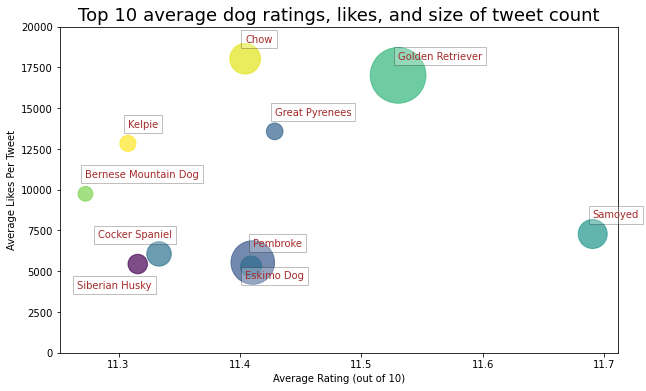

In [879]:
# Visualize scatter with ratings in x, likes in y, and size of marker weighted by tweet count

average_rating = top10_rated_dogs.avg_rating*10
average_likes = top10_rated_dogs.avg_fav
tweets = top10_rated_dogs.tweets*20

np.random.seed(146)
colors = np.random.rand(10)

plt.scatter(average_rating,average_likes,s=tweets,c=colors, alpha=0.7);

for i in range(10):
    if average_likes.index[i] == 'Siberian Husky':  
        plt.text(x=average_rating[i]-0.05,y=average_likes[i]-1500,s=average_likes.index[i],fontdict=dict(color='brown',size=10),bbox=dict(facecolor='white',alpha=0.25))
    elif average_likes.index[i] == 'Eskimo Dog':
        plt.text(x=average_rating[i]-0.005,y=average_likes[i]-750,s=average_likes.index[i],fontdict=dict(color='brown',size=10),bbox=dict(facecolor='white',alpha=0.25))
    elif average_likes.index[i] == 'Cocker Spaniel':
        plt.text(x=average_rating[i]-0.05,y=average_likes[i]+1000,s=average_likes.index[i],fontdict=dict(color='brown',size=10),bbox=dict(facecolor='white',alpha=0.25))
    else:
        plt.text(x=average_rating[i],y=average_likes[i]+1000,s=average_likes.index[i],fontdict=dict(color='brown',size=10),bbox=dict(facecolor='white',alpha=0.25))

plt.title('Top 10 average dog ratings, likes, and size of tweet count',fontsize=18)
plt.ylabel('Average Likes Per Tweet')
plt.xlabel('Average Rating (out of 10)')

plt.ylim(0,20000);

fig =plt.gcf()
fig.set_size_inches(10, 6)

plt.savefig('chart_dogs.png')


In [ ]:
# Find one dog to talk about
df.query('dog == "Samoyed" and rating_numerator == 13')[5:6]

In [ ]:
# Find text about the dog
paisley_id = df.query('dog == "Samoyed" and rating_numerator == 13')['tweet_id'][281]
df1v2[df1v2['tweet_id'] == paisley_id]['text'].tolist()[0][:88]

In [ ]:
df.query('dog == "Samoyed" and rating_numerator == 13')['jpg_url']

In [ ]:
# Get image of Samoyed
from PIL import Image
from io import BytesIO

url = df.query('dog == "Samoyed" and rating_numerator == 13')['jpg_url'][98]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [ ]:
# Open chart without more code
Image.open('chart_dogs.png')

In [857]:
# Write resulting cleaned up dataframe to csv
df.to_csv('weratedogs_clean.csv')